In [242]:
import tensorflow as tf
import keras
import random
import os  # Helps you manage files and folders
import cv2  # Working with images
import numpy as np
import seaborn as sns  # Helps you visual ize your discoveries
import matplotlib.pyplot as plt  # To plot images

print("tensorflow version: "+ tf.__version__)
def set_seed(seed=0):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  random.seed(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = "1"
  os.environ['TF_CUDNN_DETERMINISM'] = "1"
  os.environ['PYTHONHASHSEED'] = str(seed)
  keras.utils.set_random_seed(seed)

set_seed()

tensorflow version: 2.16.2


In [243]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("\nAll physical devices:")
print(tf.config.list_physical_devices())

TensorFlow version: 2.16.2

All physical devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [244]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [245]:
from PIL import Image

def get_data(data_dir, labels, img_size, seed=0):
    np.random.seed(seed)  # Setzt den Seed für numpy
    random.seed(seed)     # Setzt den Seed für random
    
    x = []
    y = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        print(f"Processing label: {label}, class_num: {class_num}")  

        # Dateien sortieren, um eine feste Reihenfolge sicherzustellen
        for img in sorted(os.listdir(path)):
            image = Image.open(os.path.join(path, img))
            resized_img = image.resize((img_size, img_size))
            resized_arr = np.array(resized_img)

            x.append(resized_arr)
            y.append(class_num)

    return (np.array(x, dtype=int), np.array(y, dtype=int))



In [246]:
img_size = 64
# Types of labels
labels = ['blue', 'red', 'white', 'fail']
x_test, y_test = get_data("data/test_four_label", labels, img_size, seed=0)
x_train, y_train = get_data("data/train_four_label", labels, img_size, seed=0)



Processing label: blue, class_num: 0
Processing label: red, class_num: 1
Processing label: white, class_num: 2
Processing label: fail, class_num: 3
Processing label: blue, class_num: 0
Processing label: red, class_num: 1
Processing label: white, class_num: 2
Processing label: fail, class_num: 3


In [247]:
# Count the occurrences of each class
test_class_counts = [np.count_nonzero(y_test == i) for i in range(len(labels))]
print(f"Test class counts: {test_class_counts}")
print(f"Total test data: {sum(test_class_counts)}")

train_class_counts = [np.count_nonzero(y_train == i) for i in range(len(labels))]
print(f"Train class counts: {train_class_counts}")
print(f"Total train data: {sum(train_class_counts)}")

Test class counts: [59, 59, 57, 179]
Total test data: 354
Train class counts: [140, 140, 140, 420]
Total train data: 840


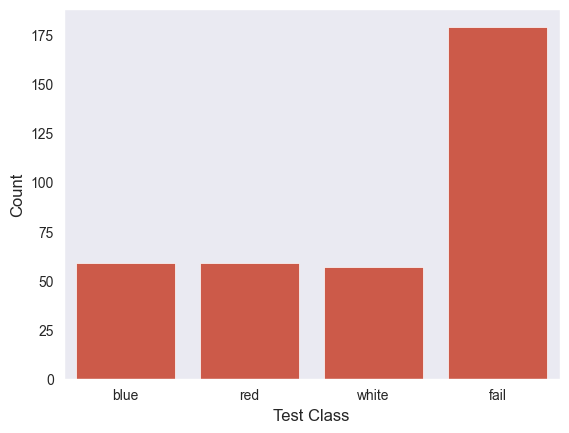

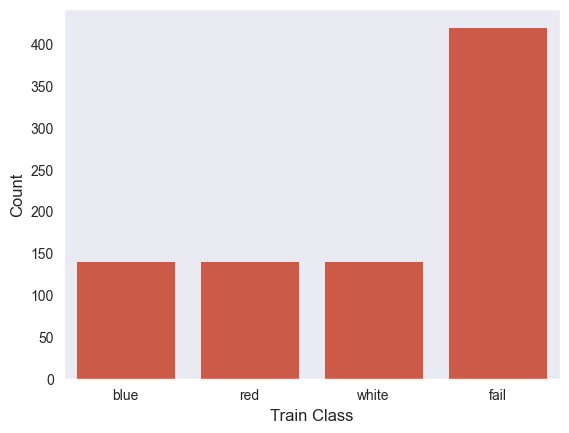

In [248]:
# Plot the test class counts

sns.set_style('dark')
sns.barplot(x=labels, y=test_class_counts)
plt.xlabel("Test Class")
plt.ylabel("Count")
plt.show()

sns.set_style('dark')
sns.barplot(x=labels, y=train_class_counts)
plt.xlabel("Train Class")
plt.ylabel("Count")
plt.show()

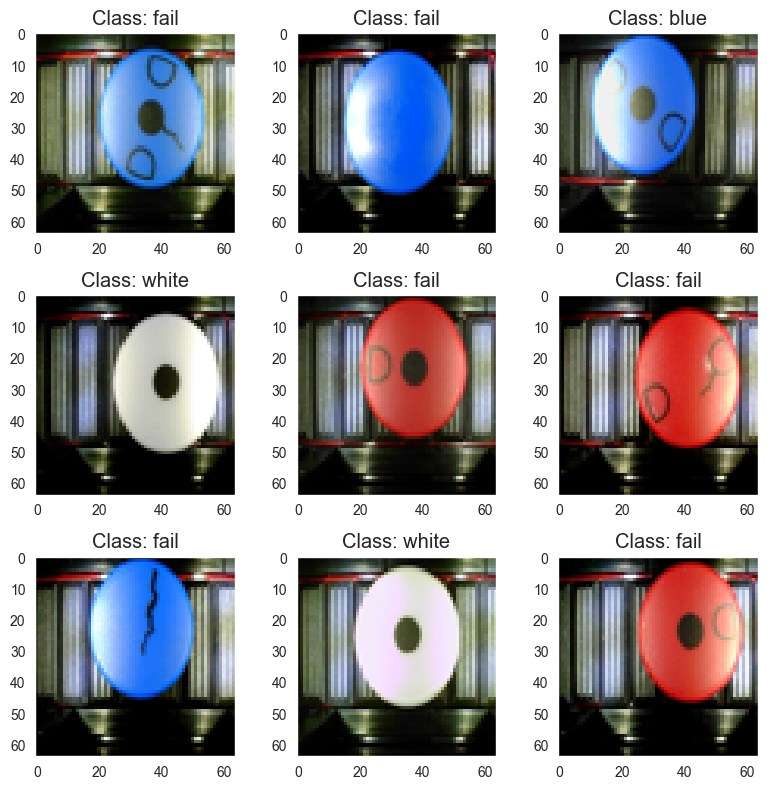

In [249]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(8,8)
for i in range(3):
    for j in range (3):
        l = random.randint(0, len(y_test))
        ax[i,j].imshow(x_test[l])
        ax[i,j].set_title('Class: ' + labels[y_test[l]])

plt.tight_layout()

In [250]:
def normalize_data(x):
    """
    Normalize pixel values of the image data.

    Argument:
    x -- a list or numpy array of image data in the range of [0-255]

    Returns:
    x -- Normalized image data in the range of [0-1]
    """

    ### START CODE HERE ### (1 line)
    x = x.astype('float32')
    x = x / 255.0   
    ### END CODE HERE ###

    return x

x_test = normalize_data(x_test)
x_train = normalize_data(x_train)

In [251]:

y_train = keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test = keras.utils.to_categorical(y_test, num_classes=len(labels))

# Verify shapes
print("\nFinal shapes after processing:")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


Final shapes after processing:
x_train shape: (840, 64, 64, 3)
y_train shape: (840, 4)
x_test shape: (354, 64, 64, 3)
y_test shape: (354, 4)


In [252]:
# Function for adjusting the learning rate
def scheduler(epoch, lr):
    """
    Learning rate scheduler function.

    Arguments:
    epoch -- the current training epoch number.
    lr -- the current learning rate.

    Returns:
    updated_lr -- the updated learning rate for the next epoch.
    For the first 9 epochs: no changes
    Epoch >= 10: reduce learning rate every epoch by 10%
    """
### START CODE HERE ### (~4 lines)
    try:
        if epoch < 10:
            return float(lr)
        else:
            return float(lr * 0.9)
    except:
        return 0.001 
### END CODE HERE ###

# Learning rate scheduler callback
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

In [253]:

from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import L2

from sklearn.utils import compute_class_weight


def add_layers(model, input_shape, num_classes):
     # Convolutional Layers mit reduzierten Filtern
     
    
    model. add (keras. layers.InputLayer(shape=input_shape))
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu', kernel_regularizer=L2(3.5e-06,)))
    model. add (keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model. add (keras.layers.Dropout(0.15))
     
    model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu', kernel_regularizer=L2(8e-06)))
    model. add (keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu', kernel_regularizer=L2(4e-05)))
    model. add (keras. layers.MaxPooling2D(pool_size=(2, 2)))
    model. add (keras. layers. Dropout(0.1))
     
    model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu', kernel_regularizer=L2(1.5e-05))) 
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='elu', kernel_regularizer=L2(2.5e-04)))
    model. add (keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model. add (keras. layers. Dropout (0.4))
     
    model. add (keras. layers.Flatten())
    model. add (keras. layers.Dense(230, activation='elu', kernel_regularizer=L2(7e-05)))
    model. add (keras. layers.BatchNormalization())
    model. add (keras. layers.Dropout(0.35))
    model. add (keras. layers.Dense(250, activation='elu' , kernel_regularizer=L2(3e-06)))
    model. add (keras. layers.BatchNormalization())
    model. add (keras. layers.Dropout(0.4))
    model. add (keras.layers.Dense(num_classes, activation='softmax'))
    

    return model
# Callbacks
callbacks = [
   keras.callbacks.EarlyStopping(
       monitor='val_accuracy',
       patience=10,
       restore_best_weights=True
   ),
   keras.callbacks.ReduceLROnPlateau(
       monitor='val_accuracy',
       factor=0.3,
       patience=5,
       min_lr=0.00001
   )
]




# Create and compile model
keras.backend.clear_session()
set_seed(42)
model = add_layers(keras.Sequential(), x_train.shape[1:], len(labels))
model.compile(
   optimizer=keras.optimizers.RMSprop(learning_rate=0.0004172401899107649),
   loss='categorical_crossentropy',
   metrics=['accuracy'],
    
)

#Training
history = model.fit(
   x_train,
    y_train,
   validation_data=(x_test, y_test),
   epochs=42,
   batch_size=48,
    callbacks=callbacks,
)

Epoch 1/42
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.3399 - loss: 2.0048 - val_accuracy: 0.5056 - val_loss: 1.2001 - learning_rate: 4.1724e-04
Epoch 2/42
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4338 - loss: 1.6661 - val_accuracy: 0.5395 - val_loss: 1.1495 - learning_rate: 4.1724e-04
Epoch 3/42
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4249 - loss: 1.4430 - val_accuracy: 0.5367 - val_loss: 1.1244 - learning_rate: 4.1724e-04
Epoch 4/42
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4687 - loss: 1.4483 - val_accuracy: 0.5282 - val_loss: 1.1209 - learning_rate: 4.1724e-04
Epoch 5/42
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5023 - loss: 1.3478 - val_accuracy: 0.5000 - val_loss: 1.0569 - learning_rate: 4.1724e-04
Epoch 6/42
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5466 - loss: 1.2473 - val_accuracy: 0.5763 - val_loss: 1.0092 - learning_rate: 4.1724e-04
Epoch 7/42
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5664

In [254]:
# Step 4: Evaluation can either be done during training (see above) or as a
# separate step using self_designed_score = <model>.evaluate(...)

# Exercise: Fill the self_designed_score variable
### START CODE HERE ### (1 line)
self_designed_score = model.evaluate(x_test, y_test, verbose=0)
### EMD CODE HERE ###

# Print from model history:
print(f"self_designed - Training accuracy: {history.history['accuracy'][-1]:.2f}")
print(f"self_designed - Validation accuracy: {history.history['val_accuracy'][-1]:.2f}\n")

# Print from evaluation step:
print(f"self_designed - Validation loss: {self_designed_score[0]:.2f}")
print(f"self_designed - Validation accuracy: {self_designed_score[1]:.2f}")


self_designed - Training accuracy: 0.94
self_designed - Validation accuracy: 0.93

self_designed - Validation loss: 0.30
self_designed - Validation accuracy: 0.93


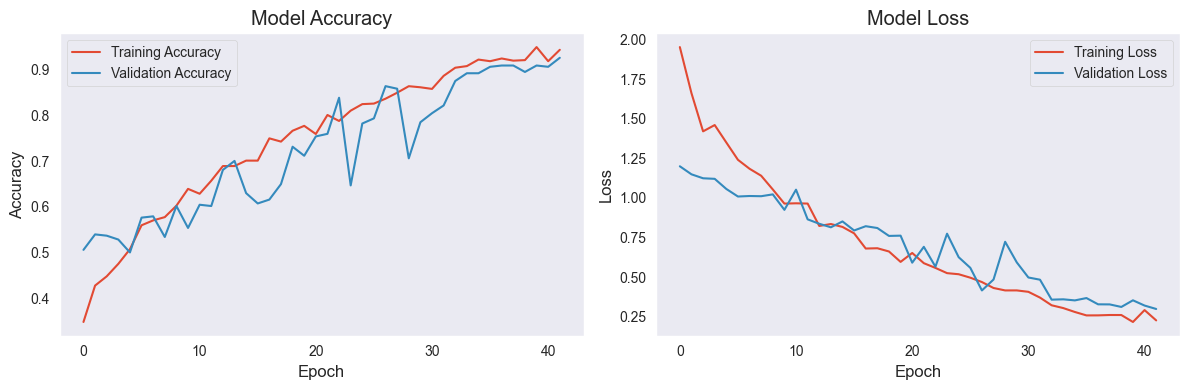

In [262]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [256]:

# Test Funktion
def test_prediction(image_path):
    """
    Test model prediction on a single image
    """
    # Load and preprocess image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (64, 64))
    input_image = np.array(resized_image, dtype=np.float32)
    input_image = input_image.reshape(1, 64, 64, 3)
    
    # Get prediction
    prediction = model.predict(input_image)
    predicted_label = labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    # Display results
    plt.figure(figsize=(6, 4))
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label} (Confidence: {confidence:.3f})")
    plt.axis('off')
    plt.show()
    
    print("\nConfidence scores:")
    for label, conf in zip(labels, prediction[0]):
        print(f"{label}: {conf:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


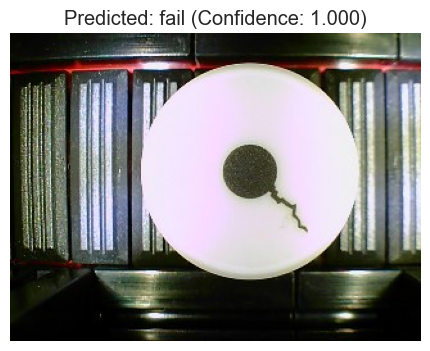


Confidence scores:
blue: 0.000
red: 0.000
white: 0.000
fail: 1.000


In [257]:
test_prediction(f'data/test_four_label/fail/white_fail_157.jpg')

In [258]:
# Evaluiere das komplette Test-Set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predictions für alle Test-Bilder
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9302 - loss: 0.2804

Test accuracy: 0.9266
Test loss: 0.2989
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


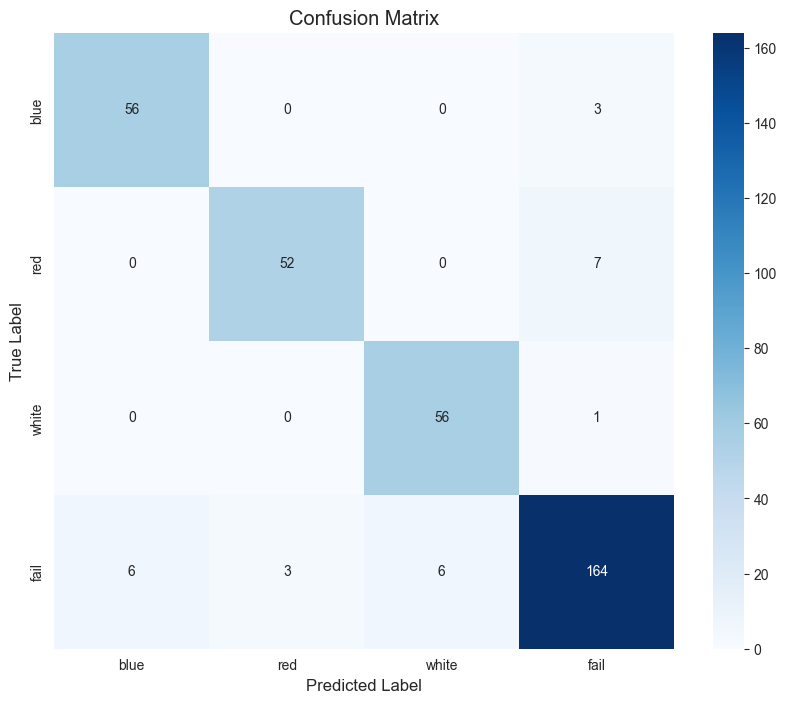


Beispiele mit niedrigster Konfidenz:


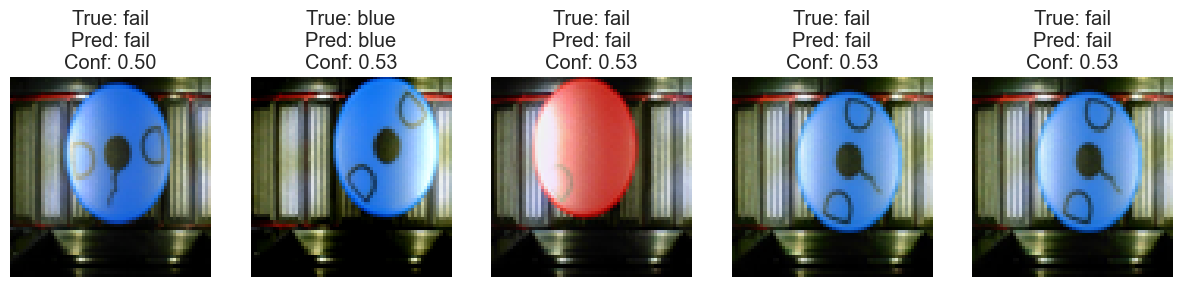


Classification Report:
              precision    recall  f1-score   support

        blue       0.90      0.95      0.93        59
         red       0.95      0.88      0.91        59
       white       0.90      0.98      0.94        57
        fail       0.94      0.92      0.93       179

    accuracy                           0.93       354
   macro avg       0.92      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354



In [261]:
from sklearn.metrics import confusion_matrix, classification_report

# Detaillierte Analyse mit Fokus auf falsch klassifizierte Fälle
def analyze_predictions():
    # Vorhersagen machen
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Falsch klassifizierte Beispiele finden
    misclassified = np.where(y_pred_classes != y_test_classes)[0]
    
    # Zeige die am wenigsten sicheren Klassifikationen
    confidences = np.max(y_pred, axis=1)
    least_confident = np.argsort(confidences)[:5]
    
    print("\nBeispiele mit niedrigster Konfidenz:")
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(least_confident):
        plt.subplot(1, 5, i+1)
        plt.imshow(x_test[idx])
        true_label = labels[y_test_classes[idx]]
        pred_label = labels[y_pred_classes[idx]]
        conf = confidences[idx]
        plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {conf:.2f}')
        plt.axis('off')
    plt.show()

    # Klassifikationsbericht ausgeben
    print("\nClassification Report:")
    print(classification_report(y_test_classes, y_pred_classes, target_names=labels))

    return y_pred, y_pred_classes, y_test_classes

# Führe die Analyse aus
y_pred, y_pred_classes, y_test_classes = analyze_predictions()

In [260]:
# save model and its architecture
#model.save('models/98_93.keras')